In [1]:
import os

iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

In [2]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=100):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [3]:
urls = search_images('chimpanse photos', max_images=5)
urls[2]

Searching for 'chimpanse photos'


'https://animalia-life.com/data_images/chimpanzee/chimpanzee5.jpg'

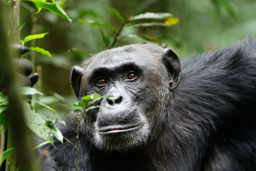

In [4]:
from fastdownload import download_url
dest = 'chimp.jpg'
download_url(urls[2], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'gorilla photos'


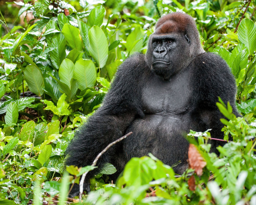

In [5]:
download_url(search_images('gorilla photos', 
                           max_images=1)[0],'gorilla.jpg', show_progress=False)
Image.open('gorilla.jpg').to_thumb(256,256)

Searching for 'orangutan photos'


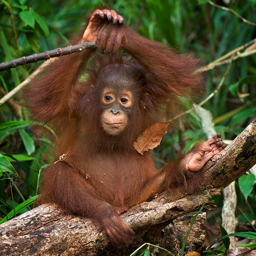

In [6]:
download_url(search_images('orangutan photos', 
                           max_images=1)[0],'orangutan.jpg', show_progress=False)
Image.open('orangutan.jpg').to_thumb(256,256)

In [7]:
searches = 'chimpanzee','gorilla', 'orangutan', 'baboon', 'macaque', 'guenon', 'mandrill', 'proboscis', 'capuchin', 'marmoset', 'tamarin', 'gibbon'
path = Path('monke')

from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} monkey photo'))
    sleep(5)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} monkey sun photo'))
    sleep(5)
    download_images(dest, urls=search_images(f'{o} monkey shade photo'))
    sleep(5)
    download_images(dest, urls=search_images(f'{o} monkey portrait'))
    sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'chimpanzee monkey photo'
Searching for 'chimpanzee monkey sun photo'
Searching for 'chimpanzee monkey shade photo'
Searching for 'chimpanzee monkey portrait'
Searching for 'gorilla monkey photo'
Searching for 'gorilla monkey sun photo'
Searching for 'gorilla monkey shade photo'
Searching for 'gorilla monkey portrait'
Searching for 'orangutan monkey photo'
Searching for 'orangutan monkey sun photo'
Searching for 'orangutan monkey shade photo'
Searching for 'orangutan monkey portrait'
Searching for 'baboon monkey photo'
Searching for 'baboon monkey sun photo'
Searching for 'baboon monkey shade photo'
Searching for 'baboon monkey portrait'
Searching for 'macaque monkey photo'
Searching for 'macaque monkey sun photo'
Searching for 'macaque monkey shade photo'
Searching for 'macaque monkey portrait'
Searching for 'guenon monkey photo'
Searching for 'guenon monkey sun photo'
Searching for 'guenon monkey shade photo'
Searching for 'guenon monkey portrait'
Searching for 'mandril

In [8]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

73

In [9]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

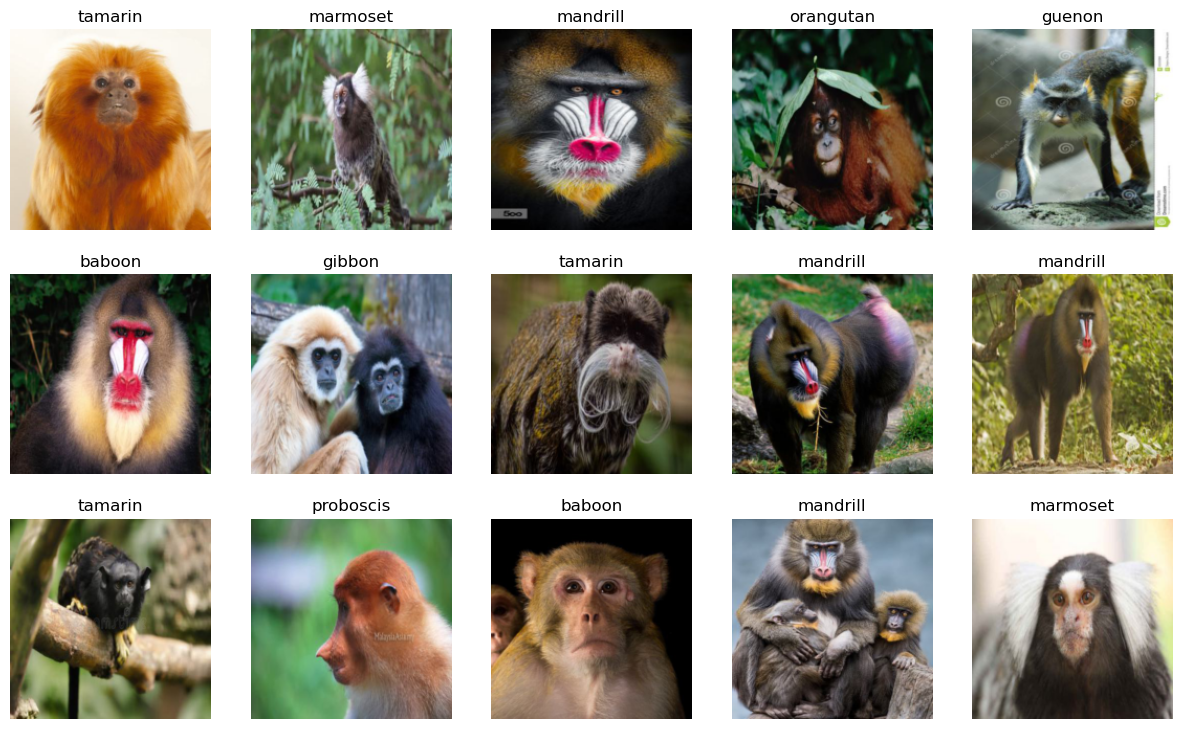

In [10]:
dls.show_batch(max_n=15)

In [11]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.186881,0.435987,0.131004,00:28


epoch,train_loss,valid_loss,error_rate,time
0,0.512553,0.358107,0.098253,00:24
1,0.271448,0.292443,0.086245,00:23
2,0.121741,0.282161,0.081878,00:23


In [12]:
monke,_,probs = learn.predict('orangutan.jpg')
print(f"This is a: {monke}.")
print(f"Probability it's a {monke}: {max(probs):.4f}")

This is a: orangutan.
Probability it's a orangutan: 1.0000


In [13]:
learn.export()